In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
data3 = pd.read_csv("H (1).csv")
data4 = pd.read_csv("H.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [5]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,37.259998,39.840000,34.060001,38.660000,37.885616,4787700
1,2016-01-25,38.450001,38.900002,37.000000,38.680000,37.905216,3897700
2,2016-02-01,38.310001,40.549999,37.000000,39.630001,38.836185,4443400
3,2016-02-08,39.070000,40.580002,37.660000,39.610001,38.816589,3353500
4,2016-02-15,40.230000,45.650002,40.230000,45.580002,44.667011,5170500


In [6]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,88.070831,82.314120,93.612094
433,2020-08-25,88.070481,82.642248,93.724036
434,2020-08-26,88.071971,82.553188,94.314676
435,2020-08-27,88.076113,82.537127,94.013006
436,2020-08-28,88.083732,82.164774,93.972255


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

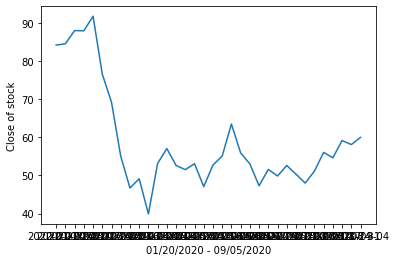

In [8]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

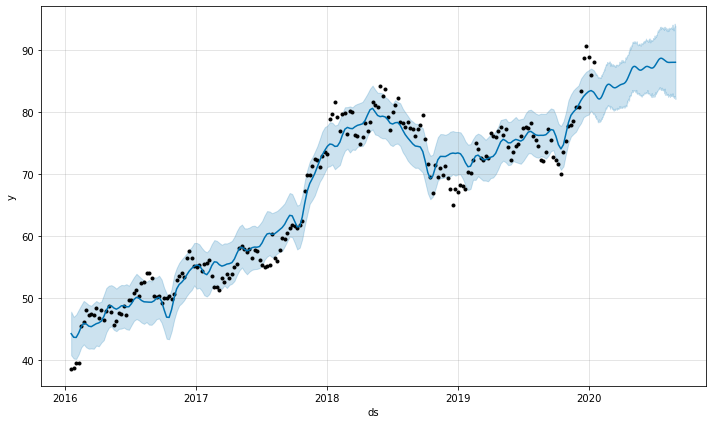

In [9]:
fig1 = m4.plot(forecast)

In [10]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,51.709999,56.990002,51.619999,56.060001,56.060001,5291100
30,2020-08-17,56.180000,56.209999,52.389999,54.639999,54.639999,3481900
31,2020-08-24,55.750000,59.299999,53.889999,59.160000,59.160000,5756800
32,2020-08-31,59.529999,59.980000,55.220001,58.110001,58.110001,4100500
33,2020-09-04,59.009998,60.560001,58.310101,59.990002,59.990002,1085698


In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,89.113026,82.314120,93.612094,84.738317,93.664701,-1.042195,-1.042195,-1.042195,-1.042195,-1.042195,-1.042195,0.0,0.0,0.0,88.070831
433,2020-08-25,89.145274,82.642248,93.724036,84.751817,93.742072,-1.074792,-1.074792,-1.074792,-1.074792,-1.074792,-1.074792,0.0,0.0,0.0,88.070481
434,2020-08-26,89.177521,82.553188,94.314676,84.748883,93.790262,-1.105550,-1.105550,-1.105550,-1.105550,-1.105550,-1.105550,0.0,0.0,0.0,88.071971
435,2020-08-27,89.209769,82.537127,94.013006,84.735302,93.838453,-1.133656,-1.133656,-1.133656,-1.133656,-1.133656,-1.133656,0.0,0.0,0.0,88.076113
436,2020-08-28,89.242017,82.164774,93.972255,84.731622,93.884730,-1.158284,-1.158284,-1.158284,-1.158284,-1.158284,-1.158284,0.0,0.0,0.0,88.083732


In [14]:
hyatt_impact = (59.990002 - 88.083732)/88.083732 * 100
print("Hyatt's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", hyatt_impact, "% as of 09/05/2020")

Hyatt's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 -31.894345711873335 % as of 09/05/2020
